## High Correlation Filter Data

In [782]:
# removing highly correlated features

corr_matrix = data.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_data = corr_matrix.mask(mask)

to_drop = [x for x in tri_data.columns if any(tri_data[x] > 0.80)]

data_corr = data.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {data_corr.shape[1]} columns.")
data_corr.head()

The reduced dataframe has 15 columns.


,diagnosis,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.2419,0.07871,0.9053,0.006399,0.05373,0.01587,0.03003,0.006193,17.33,2019.0,0.1622,0.2654,0.4601,0.11890
1,M,0.1812,0.05667,0.7339,0.005225,0.01860,0.01340,0.01389,0.003532,23.41,1956.0,0.1238,0.1860,0.2750,0.08902
2,M,0.2069,0.05999,0.7869,0.006150,0.03832,0.02058,0.02250,0.004571,25.53,1709.0,0.1444,0.2430,0.3613,0.08758
3,M,0.2597,0.09744,1.1560,0.009110,0.05661,0.01867,0.05963,0.009208,26.50,567.7,0.2098,0.2575,0.6638,0.17300
4,M,0.1809,0.05883,0.7813,0.011490,0.05688,0.01885,0.01756,0.005115,16.67,1575.0,0.1374,0.1625,0.2364,0.07678


In [783]:
y= data_corr["diagnosis"]
X = data_corr.drop(columns=["diagnosis"])

#normalize
X = (X -np.min(X))/(np.max(X)-np.min(X)).values

In [784]:
#Split the train, test and validation 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = .2)

In [785]:
#Blance the train data by using upsampling
#Train data

counter = Counter(y_train)
counter
upsample = SMOTE()
X_train, y_train = upsample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({'B': 282, 'M': 282})


In [786]:
LR = LogisticRegression(max_iter = 200)
LR.fit(X_train,y_train)
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

print(f"Accuracy by using KfoldCrossVal score of Logistic Regression is: {round(cross_val_score(LR,X_train,y_train,cv=10).mean(), 4)}")

Accuracy by using KfoldCrossVal score of Logistic Regression is: 0.9556


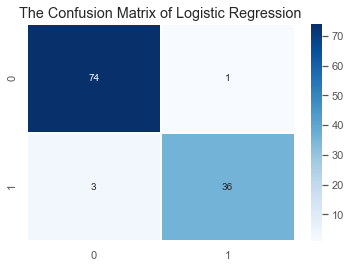

In [787]:
y_pred = LR.predict(X_test) #Predict data for eveluating 
cmLR = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of Logistic Regression')
sns.heatmap(cmLR,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [788]:
total_LR=sum(sum(cmLR))
#####from confusion matrix calculate accuracy
accuracy_LR=(cmLR[0,0]+cmLR[1,1])/total_LR
print(f"Accuracy: {round(accuracy_LR, 4)}")

sensitivity_LR = cmLR[0,0]/(cmLR[0,0]+cmLR[1,0])
print(f"Sensitivity: {round(sensitivity_LR, 4)}")

specificity_LR = cmLR[1,1]/(cmLR[0,1]+cmLR[1,1])
print(f"Specificity: {round(specificity_LR, 4)}")

balanced_accuracy_LR=(sensitivity_LR+specificity_LR )*0.5
print(f"Balanced accuracy of Logistic Regression : {round(balanced_accuracy_LR, 4)}")

Accuracy: 0.9649
Sensitivity: 0.961
Specificity: 0.973
Balanced accuracy of Logistic Regression : 0.967


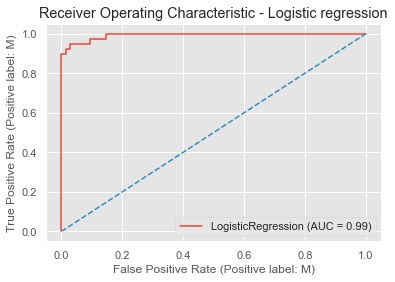

In [789]:
plot_roc_curve(LR, X_test, y_test);
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - Logistic regression');

***

### KNN

Accuracy by using KfoldCrossVal score of KNN is: 0.9561  at K = 3


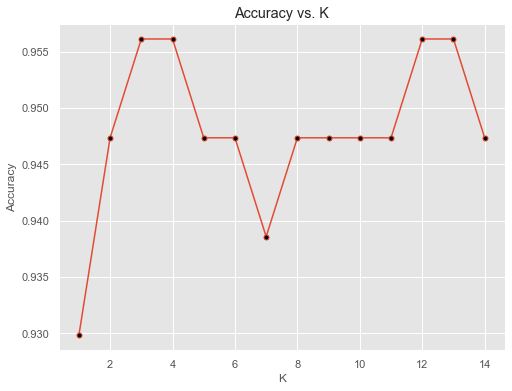

In [790]:
accuracy=[]
for i in range(1, 15):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN = KNN.fit(X_train, y_train)
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
    scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    KNN_fit_time = scores['fit_time'].mean()
    KNN_score_time = scores['score_time'].mean()
    KNN_accuracy = scores['test_accuracy'].mean()
    KNN_precision = scores['test_precision_macro'].mean()
    KNN_recall = scores['test_recall_macro'].mean()
    KNN_f1 = scores['test_f1_weighted'].mean()
    KNN_roc = scores['test_roc_auc'].mean()
   
    accuracy.append(KNN.score(X_test,y_test))

print(f"Accuracy by using KfoldCrossVal score of KNN is: {round(max(accuracy), 4)}"," at K = {}".format(accuracy.index(max(accuracy))+1))

plt.figure(figsize=(8,6))
plt.plot(range(1,15),accuracy, 
         marker='o',markerfacecolor='black', markersize=5)
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy');

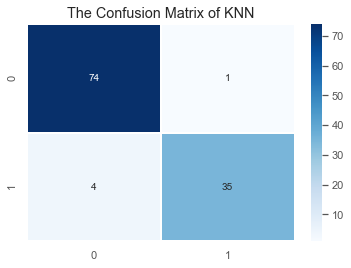

In [794]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN = KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
cmKNN = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of KNN')
sns.heatmap(cmKNN,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [795]:
total_KNN=sum(sum(cmKNN))
#####from confusion matrix calculate accuracy
accuracy_KNN=(cmKNN[0,0]+cmKNN[1,1])/total_KNN
print(f"Accuracy: {round(accuracy_KNN, 4)}")

sensitivity_KNN = cmKNN[0,0]/(cmKNN[0,0]+cmKNN[1,0])
print(f"Sensitivity: {round(sensitivity_KNN, 4)}")

specificity_KNN = cmKNN[1,1]/(cmKNN[0,1]+cmKNN[1,1])
print(f"Specificity: {round(specificity_KNN, 4)}")

balanced_accuracy_KNN=(sensitivity_KNN+specificity_KNN )*0.5
print(f"Balanced accuracy of KNN: {round(balanced_accuracy_KNN, 4)}")

Accuracy: 0.9561
Sensitivity: 0.9487
Specificity: 0.9722
Balanced accuracy of KNN: 0.9605


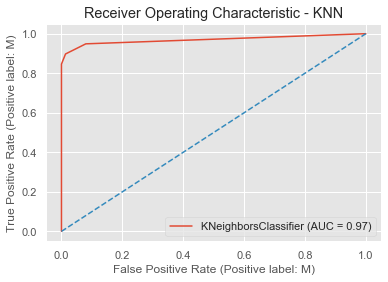

In [796]:
plot_roc_curve(KNN, X_test, y_test)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - KNN');

***

### Naive Bayes

In [797]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB = NB.fit(X_train, y_train)
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(NB, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
NB_fit_time = scores['fit_time'].mean()
NB_score_time = scores['score_time'].mean()
NB_accuracy = scores['test_accuracy'].mean()
NB_precision = scores['test_precision_macro'].mean()
NB_recall = scores['test_recall_macro'].mean()
NB_f1 = scores['test_f1_weighted'].mean()
NB_roc = scores['test_roc_auc'].mean()

print(f"Accuracy by using KfoldCrossVal score of Naive Bayes is: {round(cross_val_score(NB,X_train,y_train,cv=10).mean(), 4)}")

Accuracy by using KfoldCrossVal score of Naive Bayes is: 0.9308


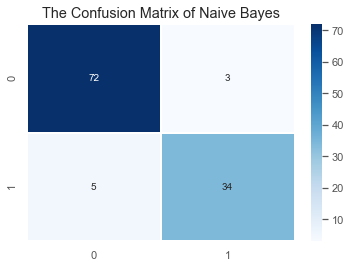

In [798]:
y_pred = NB.predict(X_test)
cmNB = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of Naive Bayes')
sns.heatmap(cmNB,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [799]:
total_NB=sum(sum(cmNB))
#####from confusion matrix calculate accuracy
accuracy_NB=(cmNB[0,0]+cmNB[1,1])/total_NB
print(f"Accuracy: {round(accuracy_NB, 4)}")

sensitivity_NB = cmNB[0,0]/(cmNB[0,0]+cmNB[1,0])
print(f"Sensitivity: {round(sensitivity_NB, 4)}")

specificity_NB = cmNB[1,1]/(cmNB[0,1]+cmNB[1,1])
print(f"Specificity: {round(specificity_NB, 4)}")

balanced_accuracy_NB=(sensitivity_NB+specificity_NB )*0.5
print(f"Balanced accuracy of Naive Bayes: {round(balanced_accuracy_NB, 4)}")

Accuracy: 0.9298
Sensitivity: 0.9351
Specificity: 0.9189
Balanced accuracy of Naive Bayes: 0.927


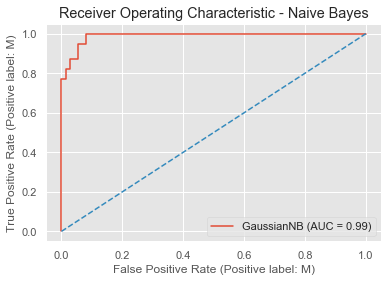

In [800]:
plot_roc_curve(NB, X_test, y_test)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - Naive Bayes');

***

### Random Forest

Accuracy by using KfoldCrossVal score of Random Forest is: 0.9737  at N = 13


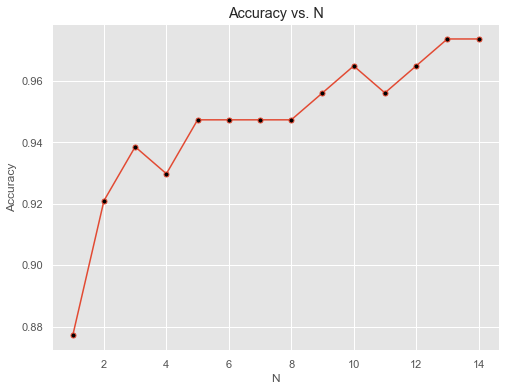

In [801]:
accuracy=[]
for i in range(1, 15):
    RF = RandomForestClassifier(n_estimators = i,random_state=0)
    RF = RF.fit(X_train, y_train)
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
    scores = cross_validate(RF, X_train, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    RF_fit_time = scores['fit_time'].mean()
    RF_score_time = scores['score_time'].mean()
    RF_accuracy = scores['test_accuracy'].mean()
    RF_precision = scores['test_precision_macro'].mean()
    RF_recall = scores['test_recall_macro'].mean()
    RF_f1 = scores['test_f1_weighted'].mean()
    accuracy.append(RF.score(X_test,y_test))

print(f"Accuracy by using KfoldCrossVal score of Random Forest is: {round(max(accuracy), 4)}"," at N = {}".format(accuracy.index(max(accuracy))+1))

plt.figure(figsize=(8,6))
plt.plot(range(1,15),accuracy, 
         marker='o',markerfacecolor='black', markersize=5)
plt.title('Accuracy vs. N')
plt.xlabel('N')
plt.ylabel('Accuracy');

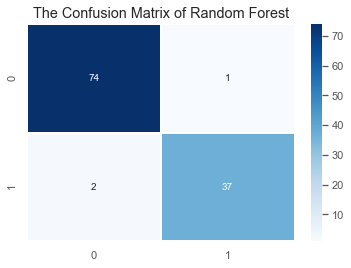

In [802]:
RF = RandomForestClassifier(n_estimators = 13,random_state=0)
RF = RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
cmRF = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of Random Forest')
sns.heatmap(cmRF,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [803]:
total_RF=sum(sum(cmRF))
#####from confusion matrix calculate accuracy
accuracy_RF=(cmRF[0,0]+cmRF[1,1])/total_RF
print(f"Accuracy: {round(accuracy_RF, 4)}")

sensitivity_RF = cmRF[0,0]/(cmRF[0,0]+cmRF[1,0])
print(f"Sensitivity: {round(sensitivity_RF, 4)}")

specificity_RF = cmRF[1,1]/(cmRF[0,1]+cmRF[1,1])
print(f"Specificity: {round(specificity_RF, 4)}")

balanced_accuracy_RF=(sensitivity_RF+specificity_RF )*0.5
print(f"Balanced accuracy of Random Forest : {round(balanced_accuracy_RF, 4)}")

Accuracy: 0.9737
Sensitivity: 0.9737
Specificity: 0.9737
Balanced accuracy of Random Forest : 0.9737


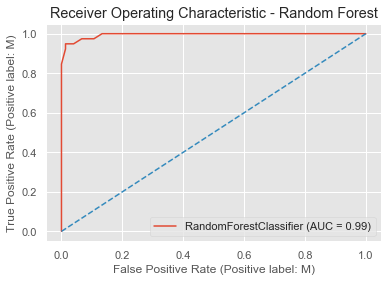

In [804]:
plot_roc_curve(RF, X_test, y_test)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - Random Forest');

In [805]:
# Feature Importance
def FeatureImportance (_model):
    fi = pd.DataFrame({'feature': list(X_train.columns),
                       'importance': _model.feature_importances_}).sort_values('importance', ascending = False)
    return fi
FeatureImportance(RF)

,feature,importance
11,concave points_worst,0.385364
9,area_worst,0.236770
8,texture_worst,0.107002
5,concave points_se,0.063705
4,concavity_se,0.045254
10,smoothness_worst,0.037926
1,fractal_dimension_mean,0.021405
0,symmetry_mean,0.017758
2,texture_se,0.017195
13,fractal_dimension_worst,0.016470


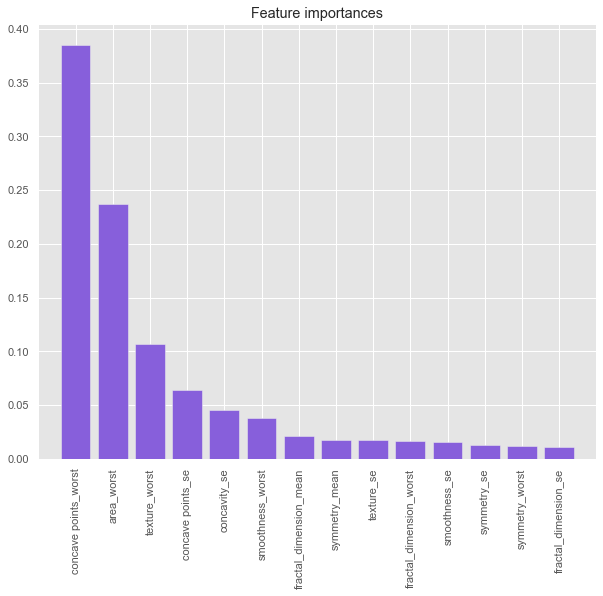

In [806]:
# Plot the feature importances of the forest

importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(1, figsize=(10,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="#875FDB", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

***

### SVM

In [807]:
# Create a Support Vector Classifier

svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']}
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_
svc

SVC(C=100, kernel='linear')

In [808]:
SVM_linear = SVC(kernel='linear',probability = True,C=100)
SVM_linear=SVM_linear.fit(X_train, y_train)
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(SVM_linear, X_train, y_train, scoring=scoring, cv=10)
sorted(scores.keys())
SVM_linear_fit_time = scores['fit_time'].mean()
SVM_linear_score_time = scores['score_time'].mean()
SVM_linear_accuracy = scores['test_accuracy'].mean()
SVM_linear_precision = scores['test_precision_macro'].mean()
SVM_linear_recall = scores['test_recall_macro'].mean()
SVM_linear_f1 = scores['test_f1_weighted'].mean()


print(f"Accuracy by using KfoldCrossVal score of SVM (linear) is: {round(cross_val_score(SVM_linear,X_train,y_train,cv=10).mean(), 4)}")

Accuracy by using KfoldCrossVal score of SVM (linear) is: 0.9751


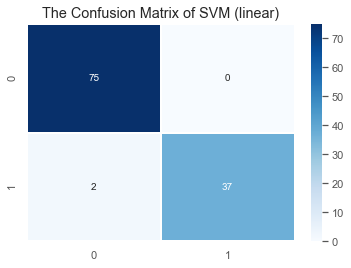

In [809]:
y_pred = SVM_linear.predict(X_test)
cm_linear = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of SVM (linear)')
sns.heatmap(cm_linear,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [810]:
total_SVM_linear=sum(sum(cm_linear))
#####from confusion matrix calculate accuracy
accuracy_SVM_linear=(cm_linear[0,0]+cm_linear[1,1])/total_SVM_linear
print(f"Accuracy: {round(accuracy_SVM_linear, 4)}")

sensitivity_SVM_linear = cm_linear[0,0]/(cm_linear[0,0]+cm_linear[1,0])
print(f"Sensitivity: {round(sensitivity_SVM_linear, 4)}")

specificity_SVM_linear = cm_linear[1,1]/(cm_linear[0,1]+cm_linear[1,1])
print(f"Specificity: {round(specificity_SVM_linear, 4)}")

balanced_accuracy_SVM_linear=(sensitivity_SVM_linear+specificity_SVM_linear )*0.5
print(f"Balanced accuracy of SVM(linear): {round(balanced_accuracy_SVM_linear, 4)}")

Accuracy: 0.9825
Sensitivity: 0.974
Specificity: 1.0
Balanced accuracy of SVM(linear): 0.987


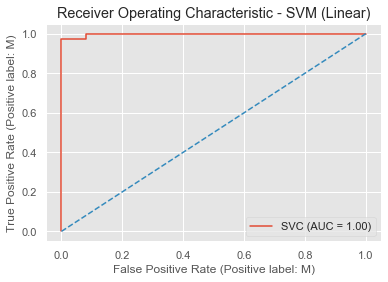

In [811]:
plot_roc_curve(SVM_linear, X_test, y_test)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - SVM (Linear)');

In [812]:
#SVM(rbf)
# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_
svc

SVC(C=1000, gamma=0.001)

In [813]:
SVM_rbf = SVC(kernel='rbf',probability = True,C=1000, gamma=0.001)
SVM_rbf=SVM_rbf.fit(X_train, y_train)
scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(SVM_rbf, X_train, y_train, scoring=scoring, cv=10)
sorted(scores.keys())
SVM_rbf_fit_time = scores['fit_time'].mean()
SVM_rbf_score_time = scores['score_time'].mean()
SVM_rbf_accuracy = scores['test_accuracy'].mean()
SVM_rbf_precision = scores['test_precision_macro'].mean()
SVM_rbf_recall = scores['test_recall_macro'].mean()
SVM_rbf_f1 = scores['test_f1_weighted'].mean()


print(f"Accuracy by using KfoldCrossVal score of SVM (rbf) is: {round(cross_val_score(SVM_rbf,X_train,y_train,cv=10).mean(), 4)}")

Accuracy by using KfoldCrossVal score of SVM (rbf) is: 0.9698


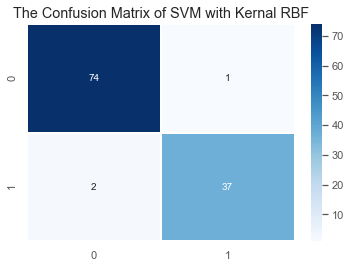

In [814]:
y_pred=SVM_rbf.predict(X_test)
cm_rbf = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of SVM with Kernal RBF')
sns.heatmap(cm_rbf,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [815]:
total_SVM_rbf=sum(sum(cm_rbf))
#####from confusion matrix calculate accuracy
accuracy_SVM_rbf=(cm_rbf[0,0]+cm_rbf[1,1])/total_SVM_rbf
print(f"Accuracy: {round(accuracy_SVM_rbf, 4)}")

sensitivity_SVM_rbf = cm_rbf[0,0]/(cm_rbf[0,0]+cm_rbf[1,0])
print(f"Sensitivity: {round(sensitivity_SVM_rbf, 4)}")

specificity_SVM_rbf = cm_rbf[1,1]/(cm_rbf[0,1]+cm_rbf[1,1])
print(f"Specificity: {round(specificity_SVM_rbf, 4)}")

balanced_accuracy_SVM_rbf=(sensitivity_SVM_rbf+specificity_SVM_rbf )*0.5
print(f"Balanced accuracy of SVM(rbf) : {round(balanced_accuracy_SVM_rbf, 4)}")

Accuracy: 0.9737
Sensitivity: 0.9737
Specificity: 0.9737
Balanced accuracy of SVM(rbf) : 0.9737


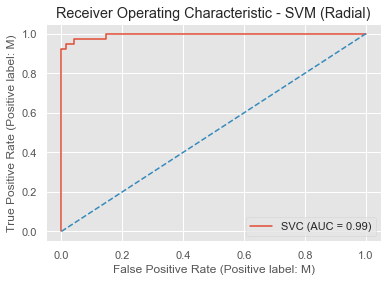

In [816]:
plot_roc_curve(SVM_rbf, X_test, y_test);
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - SVM (Radial)');

In [817]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression','Random forests','Naive Bayes','K-Nearest Neighbors', 'Support Vector Machine_linear','Support Vector Machine_radial'],
    'Fitting time': [LR_fit_time, RF_fit_time,NB_fit_time, KNN_fit_time,SVM_linear_fit_time,SVM_rbf_fit_time],
    'Scoring time': [LR_score_time,RF_score_time,NB_score_time,  KNN_score_time,SVM_linear_score_time,SVM_rbf_score_time  ],
    'Accuracy'    : [LR_accuracy, RF_accuracy, NB_accuracy, KNN_accuracy,SVM_linear_accuracy,SVM_rbf_accuracy ],
    'Balanced accuracy' :[balanced_accuracy_LR, balanced_accuracy_RF, balanced_accuracy_NB,balanced_accuracy_KNN,balanced_accuracy_SVM_linear, balanced_accuracy_SVM_rbf],
    'Precision'   : [LR_precision, RF_precision, NB_precision, KNN_precision, SVM_linear_precision,SVM_rbf_precision],
    'Recall'      : [LR_recall,RF_recall,NB_recall,KNN_recall,SVM_linear_recall,SVM_rbf_recall],
    'F1_score'    : [LR_f1, RF_f1, NB_f1, KNN_f1, SVM_linear_f1,SVM_rbf_f1],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Balanced accuracy', 'Precision',  'Recall','F1_score'])

models_correlation.sort_values(by='Balanced accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Balanced accuracy,Precision,Recall,F1_score
4,Support Vector Machine_linear,0.017650,0.006234,0.975125,0.987013,0.976252,0.975185,0.975106
1,Random forests,0.023820,0.006035,0.973371,0.973684,0.974418,0.973399,0.973338
5,Support Vector Machine_radial,0.024054,0.006353,0.969799,0.973684,0.970528,0.969828,0.969784
0,Logistic Regression,0.009056,0.010207,0.955608,0.967006,0.957324,0.955665,0.955562
3,K-Nearest Neighbors,0.002827,0.010411,0.948622,0.960470,0.951014,0.948768,0.948544
2,Naive Bayes,0.004363,0.010374,0.930827,0.926992,0.933127,0.930727,0.930722
